In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import missingno as msno

In [18]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [19]:
CLN_DATA_PATH='../data/wind-power-production-us.csv'

try:
    wind_df = pd.read_csv(CLN_DATA_PATH, index_col='date', parse_dates=True)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


C:\Users\pier3\AppData\Local\Temp\ipykernel_11528\330801704.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind_df = pd.read_csv(CLN_DATA_PATH, index_col='date', parse_dates=True)


In [20]:
print(f"The shape of my dataset is: {wind_df.shape}")

The shape of my dataset is: (266, 125)


In [21]:
wind_df.head()

,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,other_new_jersey,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,6025,678,75,348,113,91,10,42,371,66,...,--,--,26,137,133,3,--,0,0,0
2001-02-01,5310,599,77,293,103,83,9,35,338,59,...,--,--,23,151,148,3,--,0,0,0
2001-03-01,5795,660,96,327,101,93,9,33,381,73,...,--,--,22,308,300,8,--,0,0,0
2001-04-01,5827,593,92,277,106,81,9,27,361,66,...,--,--,13,399,393,6,--,0,0,0
2001-05-01,5738,640,72,336,109,86,9,27,392,73,...,--,--,16,383,378,6,--,0,0,0


In [22]:
wind_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2001-01-01 to 2023-02-01
Data columns (total 125 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    other_united_states          int64  
 1    other_new_england            int64  
 2    other_connecticut            int64  
 3    other_maine                  int64  
 4    other_massachusetts          int64  
 5    other_new_hampshire          int64  
 6    other_rhode_island           int64  
 7    other_vermont                int64  
 8    other_middle_atlantic        int64  
 9    other_new_jersey             int64  
 10   other_new_york               int64  
 11   other_pennsylvania           int64  
 12   other_east_north_central     int64  
 13   other_illinois               int64  
 14   other_indiana                int64  
 15   other_michigan               int64  
 16   other_ohio                   int64  
 17   other_wisconsin              int64  
 18   other_wes

For this we are going to use only the columms named with wind

In [24]:
wind = [col for col in wind_df.columns if 'wind' in col]
wind_df = wind_df[wind]

In [25]:
wind_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2001-01-01 to 2023-02-01
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wind                        0 non-null      float64
 1   wind_united_states          266 non-null    int64  
 2   wind_new_england            266 non-null    object 
 3   wind_connecticut            266 non-null    object 
 4   wind_maine                  266 non-null    object 
 5   wind_massachusetts          266 non-null    object 
 6   wind_new_hampshire          266 non-null    object 
 7   wind_rhode_island           266 non-null    object 
 8   wind_vermont                266 non-null    int64  
 9   wind_middle_atlantic        266 non-null    int64  
 10  wind_new_jersey             266 non-null    object 
 11  wind_new_york               266 non-null    int64  
 12  wind_pennsylvania           266 non-null    int64  
 13  wind_east_north_

In [26]:
columns_to_drop = [
    'wind',
    'wind_united_states',
    'wind_middle_atlantic',
    'wind_east_north_central',
    'wind_west_north_central',
    'wind_south_atlantic',
    'wind_district_of_columbia',
    'wind_east_south_central',
    'wind_west_south_central',
    'wind_mountain',
    'wind_pacific_contiguous',
    'wind_pacific_noncontiguous'
]

dropped_columns = [col for col in columns_to_drop if col in wind_df.columns]
wind_states_df = wind_df.drop(columns=dropped_columns)

In [27]:
wind_states_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2001-01-01 to 2023-02-01
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   wind_new_england     266 non-null    object
 1   wind_connecticut     266 non-null    object
 2   wind_maine           266 non-null    object
 3   wind_massachusetts   266 non-null    object
 4   wind_new_hampshire   266 non-null    object
 5   wind_rhode_island    266 non-null    object
 6   wind_vermont         266 non-null    int64 
 7   wind_new_jersey      266 non-null    object
 8   wind_new_york        266 non-null    int64 
 9   wind_pennsylvania    266 non-null    int64 
 10  wind_illinois        266 non-null    object
 11  wind_indiana         266 non-null    object
 12  wind_michigan        266 non-null    object
 13  wind_ohio            266 non-null    object
 14  wind_wisconsin       266 non-null    int64 
 15  wind_iowa            266 non-null    i

Now I only have the wind proction per state and the date columm

Interesting, over half of the features are objects, this is happening due to a mix of integers and strings in the same feature. This is going to result in all of the features that have a Dtype of 'object' to have their numbers be strings, which is not what we want. To get a better understanding of this, we'll look at a column classified as an object and a column classified as an integer. Notice how the object feature is an array of strings while the int64 feature is an array of pure integers. To get some quantitative analysis, we will need to convert every feature with strings into an array of integers where missing values are properly recorded as NaN.


In [29]:
wind_states_df.wind_florida.unique()

array(['--', '1'], dtype=object)

In [30]:
wind_states_df.wind_connecticut.unique()

array(['--', '1', '2', '0', 'NM'], dtype=object)

It looks like there are 2 different value types for missing values, both are strings and will need to get changed to NaN to be classified as a null value.

In [31]:
wind_states_df.replace(['--', 'NM'], np.NaN, inplace=True)
wind_states_df.wind_connecticut.unique()

C:\Users\pier3\AppData\Local\Temp\ipykernel_11528\1477874049.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wind_states_df.replace(['--', 'NM'], np.NaN, inplace=True)


array([nan, '1', '2', '0'], dtype=object)

In [32]:
# Iterate over each column in the DataFrame
for column in wind_states_df.columns:
    # Check if the column is of object type
    if wind_states_df[column].dtype == 'object':
        # Use pd.to_numeric to convert all values to numbers, errors='coerce' will convert errors (non-convertible values) to NaN
        temp_series = pd.to_numeric(wind_states_df[column], errors='coerce')
        
        # Check if all values in the temp_series are not NaN (meaning all could be converted to numbers) 
        # and check if after dropping NaN values, the Series is not empty
        if not temp_series.isnull().all() and not temp_series.dropna().empty:
            # Convert the original column to numeric type, then to int64 if possible
            wind_states_df[column] = pd.to_numeric(wind_states_df[column], errors='coerce').astype('Int64')

In [33]:
wind_states_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2001-01-01 to 2023-02-01
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wind_new_england     264 non-null    Int64  
 1   wind_connecticut     85 non-null     Int64  
 2   wind_maine           191 non-null    Int64  
 3   wind_massachusetts   192 non-null    Int64  
 4   wind_new_hampshire   182 non-null    Int64  
 5   wind_rhode_island    158 non-null    Int64  
 6   wind_vermont         266 non-null    int64  
 7   wind_new_jersey      206 non-null    Int64  
 8   wind_new_york        266 non-null    int64  
 9   wind_pennsylvania    266 non-null    int64  
 10  wind_illinois        242 non-null    Int64  
 11  wind_indiana         178 non-null    Int64  
 12  wind_michigan        255 non-null    Int64  
 13  wind_ohio            218 non-null    Int64  
 14  wind_wisconsin       266 non-null    int64  
 15  wind_iowa            

In [34]:
# Dropping columns where data type is float64 due to the column only containing null values
empty_states = [col for col in wind_states_df.columns if wind_states_df[col].dtype == 'float64' and wind_states_df[col].isna().all()]
wind_states_df = wind_states_df.drop(columns=empty_states)

<Axes: >

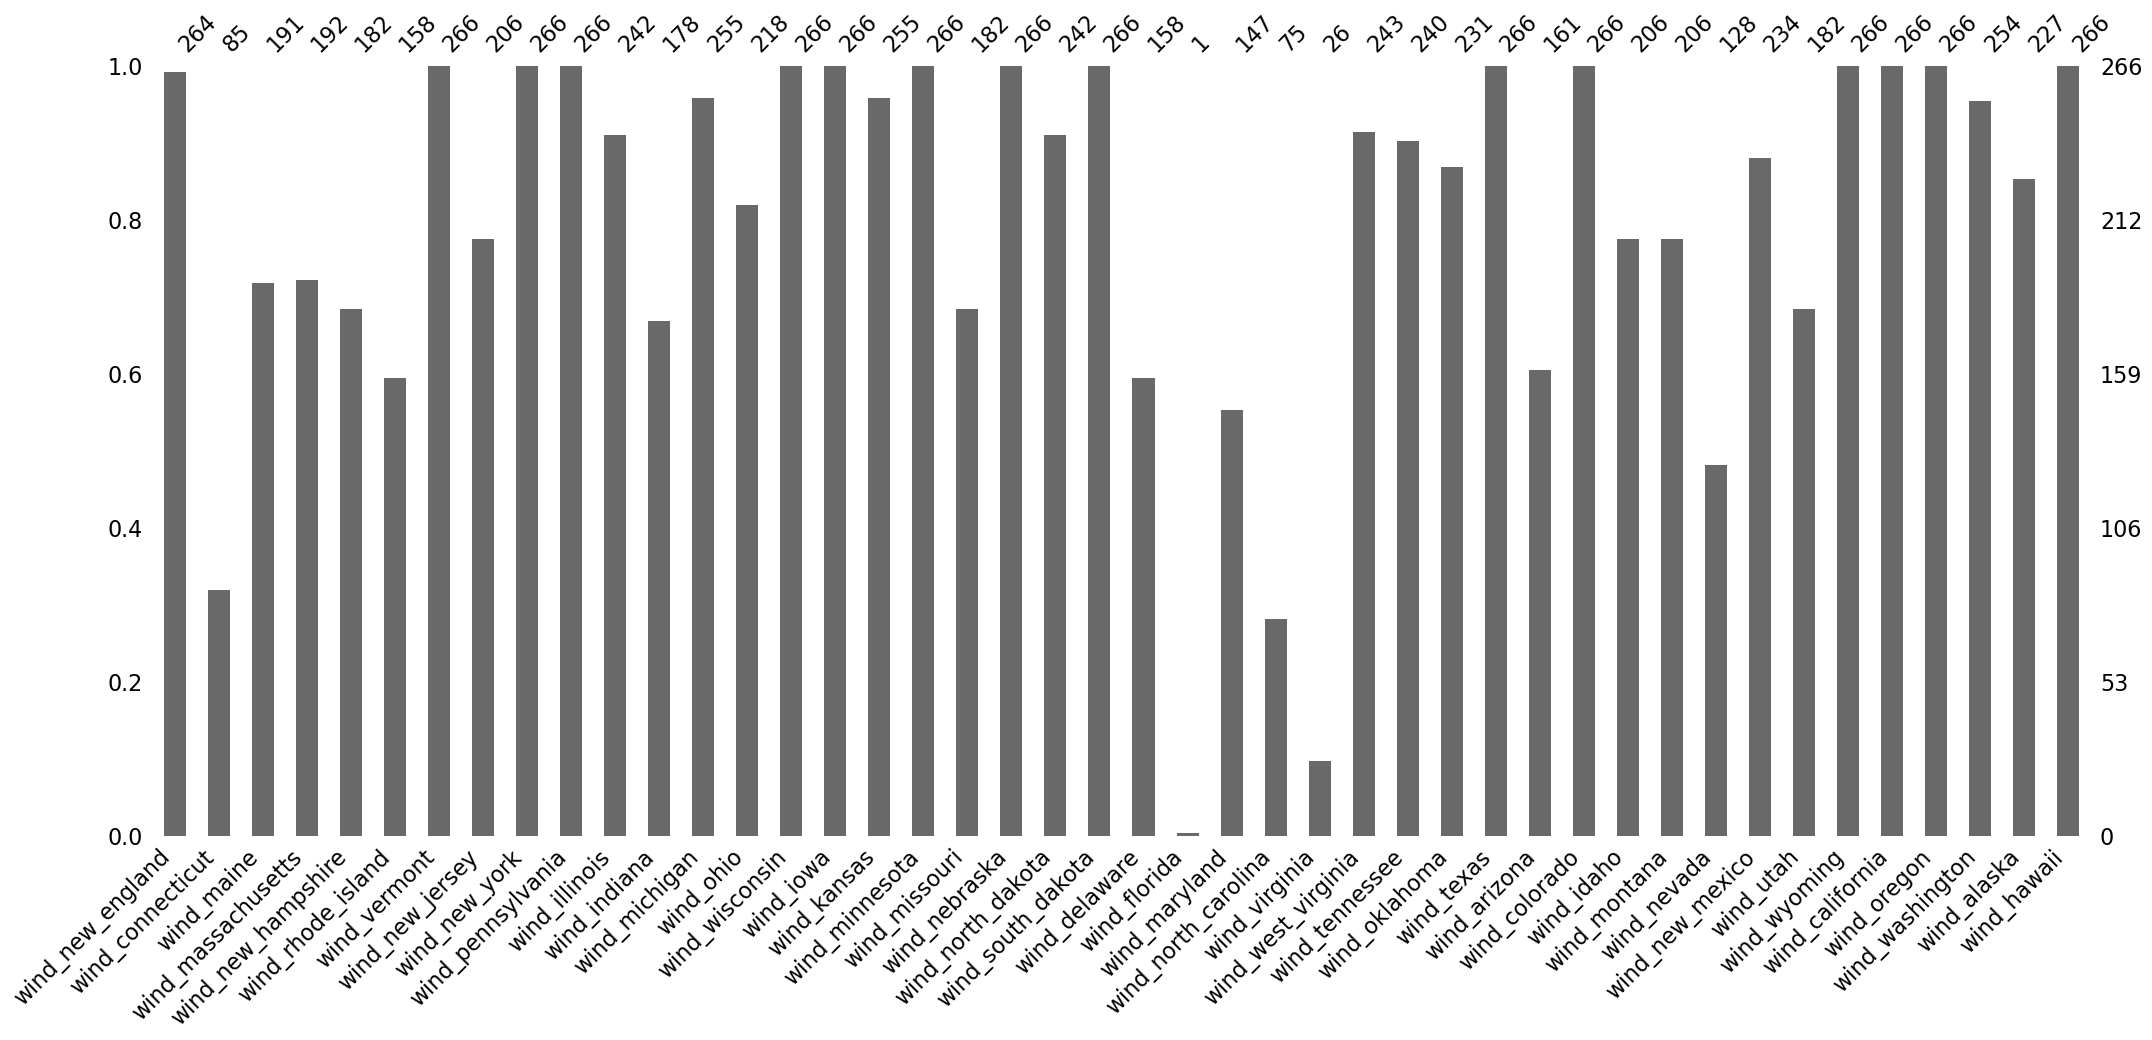

In [35]:
msno.bar(wind_states_df)

In [36]:
wind_states_df.isnull().sum()

wind_new_england         2
wind_connecticut       181
wind_maine              75
wind_massachusetts      74
wind_new_hampshire      84
wind_rhode_island      108
wind_vermont             0
wind_new_jersey         60
wind_new_york            0
wind_pennsylvania        0
wind_illinois           24
wind_indiana            88
wind_michigan           11
wind_ohio               48
wind_wisconsin           0
wind_iowa                0
wind_kansas             11
wind_minnesota           0
wind_missouri           84
wind_nebraska            0
wind_north_dakota       24
wind_south_dakota        0
wind_delaware          108
wind_florida           265
wind_maryland          119
wind_north_carolina    191
wind_virginia          240
wind_west_virginia      23
wind_tennessee          26
wind_oklahoma           35
wind_texas               0
wind_arizona           105
wind_colorado            0
wind_idaho              60
wind_montana            60
wind_nevada            138
wind_new_mexico         32
w

In [37]:
threshold = wind_states_df.shape[0] * 0.60
threshold

159.6

<Axes: >

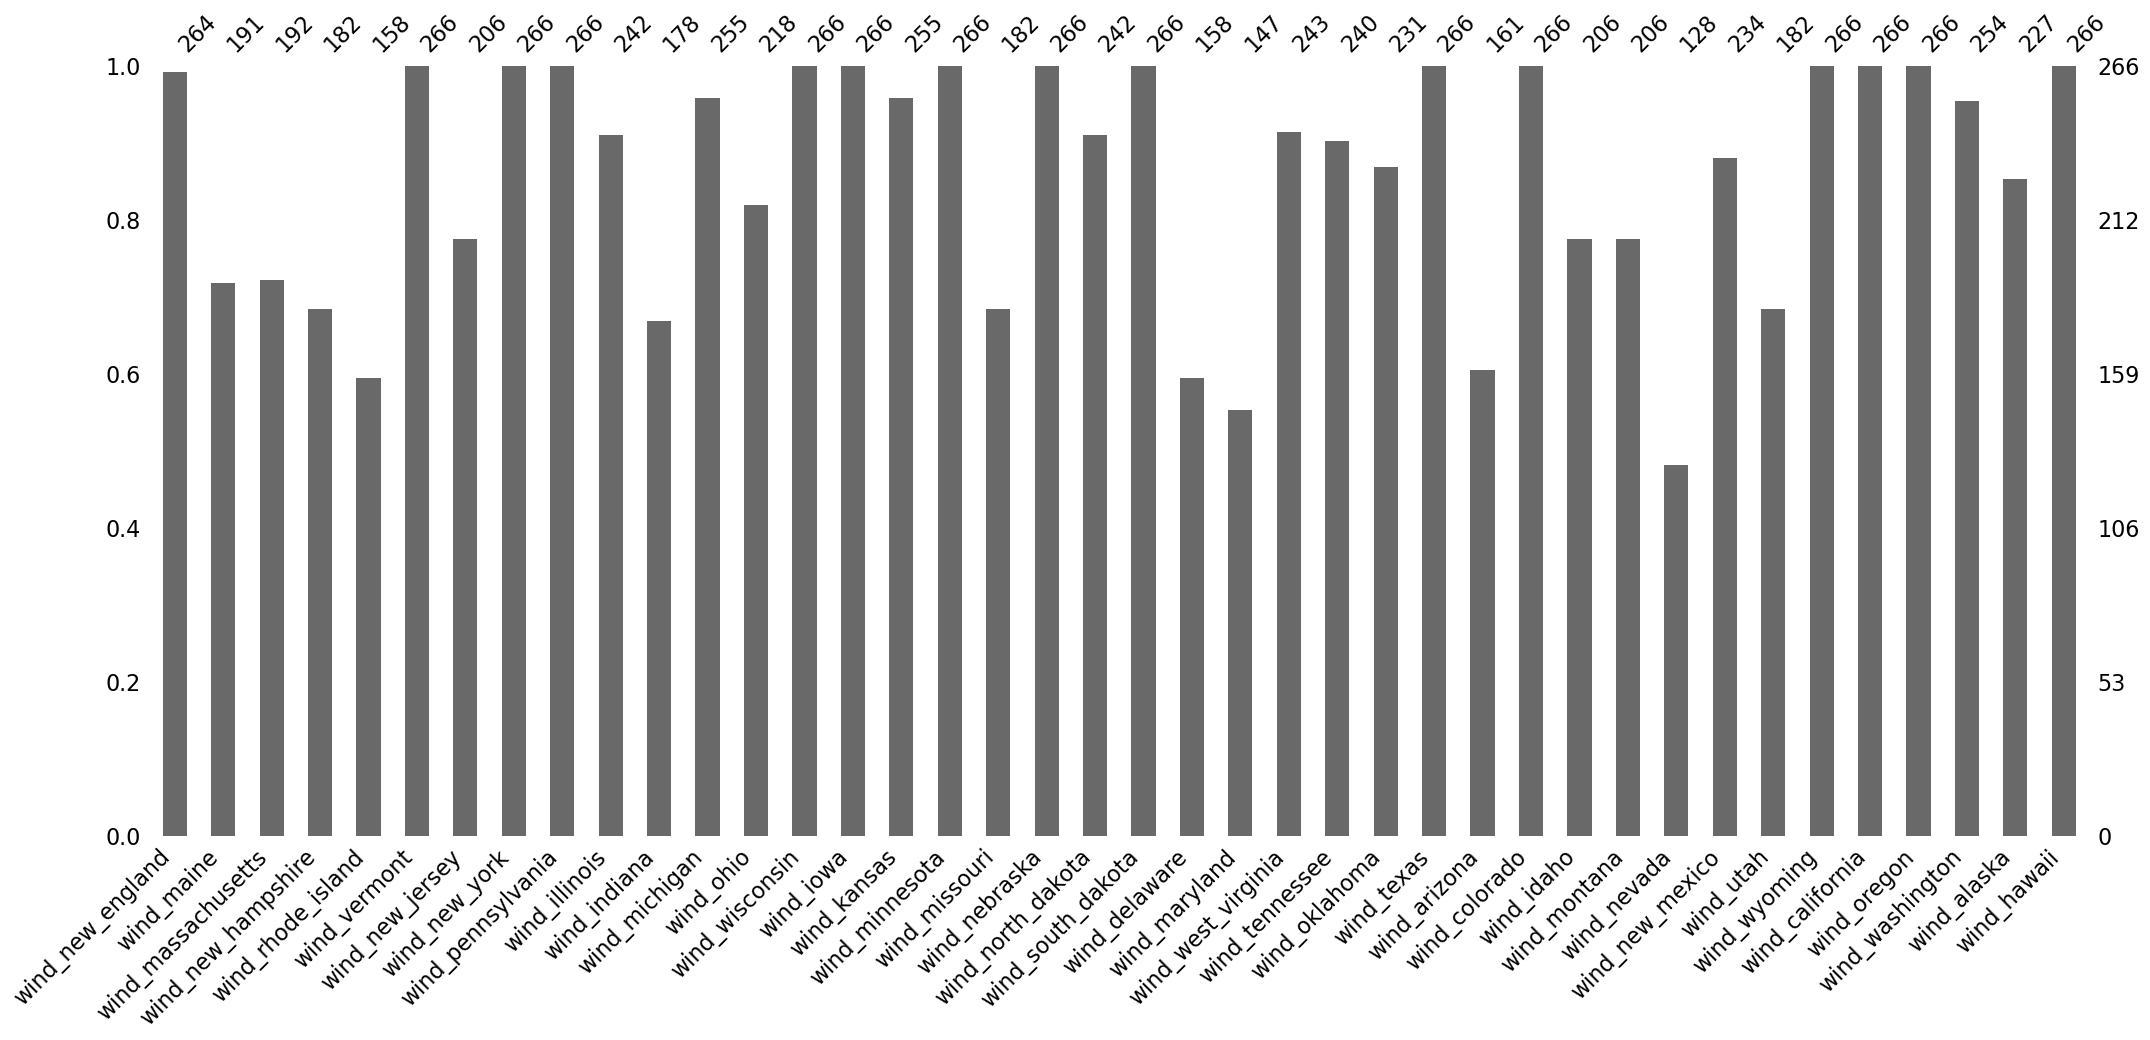

In [38]:
# If the state has missing more missing values than the threshold, it will be appended to a list
threshold_states = [column for column in wind_states_df.columns if wind_states_df[column].isnull().sum() >= threshold]

# Now to drop every state that is in this threshold list in order to only have states with missing value thresholds less than 60% 
wind_states_df = wind_states_df.drop(columns=threshold_states)
msno.bar(wind_states_df)